In [ ]:
!pip install matplotlib seaborn scipy pandas numpy

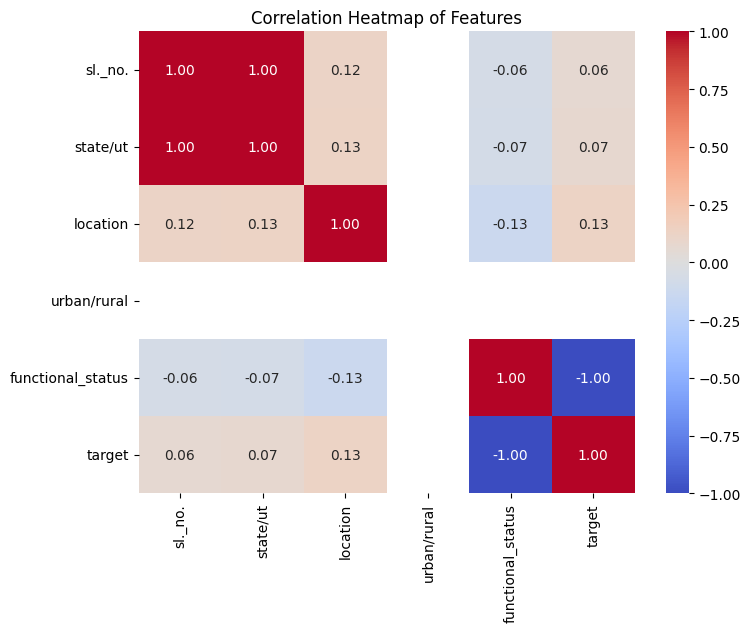


📈 MODEL PERFORMANCE METRICS 📈

=== Logistic Regression ===
Accuracy: 0.857
ROC-AUC: 0.500
                    precision    recall  f1-score   support

Under Construction       0.86      1.00      0.92        18
        Functional       0.00      0.00      0.00         3

          accuracy                           0.86        21
         macro avg       0.43      0.50      0.46        21
      weighted avg       0.73      0.86      0.79        21

=== Random Forest ===
Accuracy: 0.952
ROC-AUC: 0.833
                    precision    recall  f1-score   support

Under Construction       0.95      1.00      0.97        18
        Functional       1.00      0.67      0.80         3

          accuracy                           0.95        21
         macro avg       0.97      0.83      0.89        21
      weighted avg       0.95      0.95      0.95        21



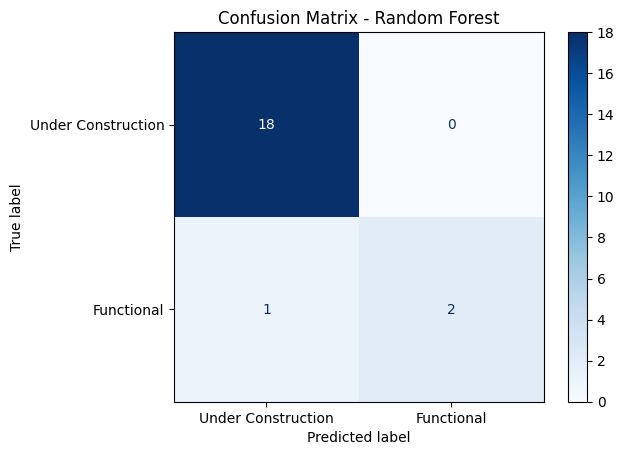

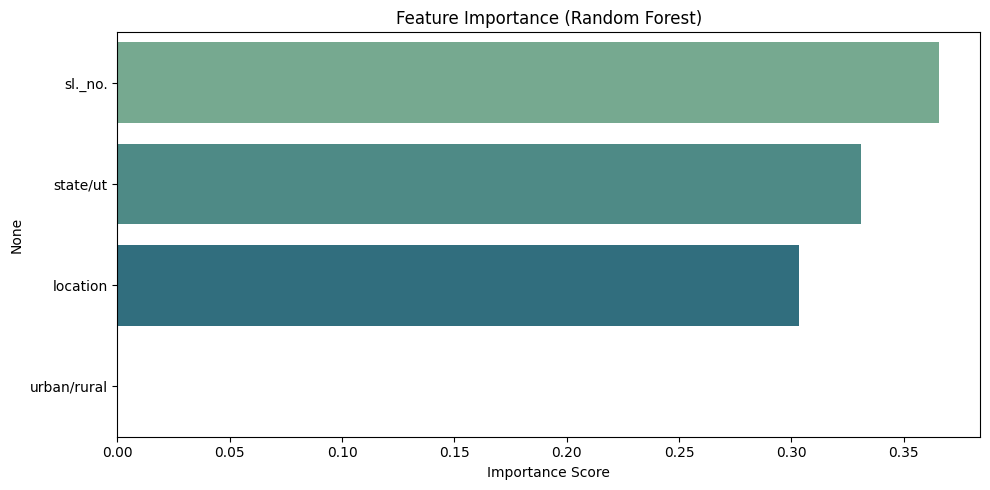


🔹 Model Comparison Matrix 🔹
                 Model  Accuracy   ROC-AUC
0  Logistic Regression  0.857143  0.500000
1        Random Forest  0.952381  0.833333


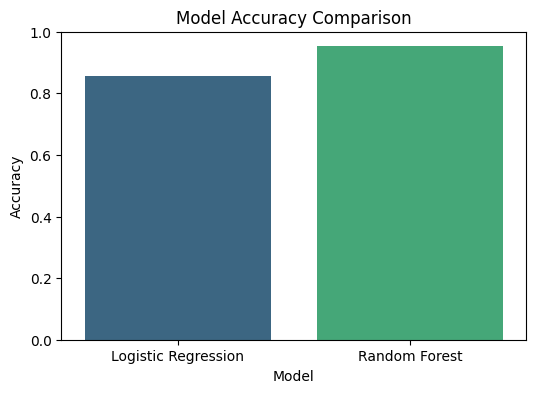


🏆 Best Performing Model: Random Forest
✅ Analysis Completed Successfully!


In [ ]:

# Submitted by: Uday Fulkatwar
# PRN: 22070521146
# Project Title: Analytical Study on Establishment of New Medical Colleges in India

import sys, subprocess, warnings
warnings.filterwarnings("ignore")

def install(pkg):
    try:
        __import__(pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

for package in ["pandas", "numpy", "matplotlib", "seaborn", "scikit-learn"]:
    install(package)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, ConfusionMatrixDisplay
)

# ---------- 1) LOAD DATA ----------
file_path = "/content/RS.csv"
data = pd.read_csv(file_path)
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# ---------- 2) BASIC CLEANING ----------
if 'functional_status' not in data.columns:
    raise KeyError("❌ Column 'functional_status' not found in the dataset!")

data = data.dropna(subset=['functional_status'])
data['state/ut'] = data['state/ut'].astype(str).str.title()

# Encode target variable
data['target'] = data['functional_status'].map({'Functional': 1, 'Under Construction': 0})

# Encode other categorical features numerically
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col].astype(str))

# ---------- 3) CORRELATION HEATMAP ----------
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Features")
plt.show()

# ---------- 4) FEATURE & TARGET SPLIT ----------
X = data.drop(columns=['functional_status', 'target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# ---------- 5) LOGISTIC REGRESSION MODEL ----------
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# ---------- 6) RANDOM FOREST MODEL ----------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# ---------- 7) METRICS & MATRICES ----------
print("\n📈 MODEL PERFORMANCE METRICS 📈\n")

# Logistic Regression Metrics
print("=== Logistic Regression ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_log):.3f}")
print(classification_report(y_test, y_pred_log, target_names=['Under Construction', 'Functional']))

# Random Forest Metrics
print("=== Random Forest ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_rf):.3f}")
print(classification_report(y_test, y_pred_rf, target_names=['Under Construction', 'Functional']))

# ---------- 8) CONFUSION MATRIX ----------
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Under Construction', 'Functional'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ---------- 9) FEATURE IMPORTANCE (RANDOM FOREST) ----------
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="crest")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# ---------- 10) PERFORMANCE MATRIX SUMMARY ----------
performance_matrix = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_rf)],
    "ROC-AUC": [roc_auc_score(y_test, y_pred_log), roc_auc_score(y_test, y_pred_rf)]
})
print("\n🔹 Model Comparison Matrix 🔹")
print(performance_matrix)

# ---------- 11) VISUAL COMPARISON ----------
plt.figure(figsize=(6,4))
sns.barplot(x="Model", y="Accuracy", data=performance_matrix, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.show()

# ---------- 12) FINAL INSIGHTS ----------
best_model = "Random Forest" if accuracy_score(y_test, y_pred_rf) > accuracy_score(y_test, y_pred_log) else "Logistic Regression"
print(f"\n🏆 Best Performing Model: {best_model}")
print("✅ Analysis Completed Successfully!")
